In [50]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as spio
import random
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys
import random

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Get N distinguisable colors
def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [2]:
mainpath = Path('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/fig5/monopolar')
mainpath.resolve()
strain_names = ['WT','klp6D', 'alp14D', 'cls1-36']
foldnames = ['wt', 'klp6d', 'alp14d', 'cls1']

df = pd.DataFrame()
df['name'] = strain_names
df['path'] = [ mainpath / relpath for relpath in foldnames]

num_strains = df.shape[0]
cols = _get_colors(num_strains)

In [7]:
all_tau = []
all_times = []

all_lens = []
all_lens_err = []
all_len_mean = []

all_amps = []
all_amps_err = []
all_amps_mean = []
all_amps_std = []

# Loop over each strain
for idx in np.arange(num_strains):
    
    # Find all dydata.mat files
    path_mats = list( df.path[idx].glob('*/dydata.mat') )

    # Initialize lifetimes and lengths arrays
    tau = []
    lens = []
    lens_err = []
    times = []
    amps = []
    amps_err = []
    
    # Loop over all dynamic feature files
    for pth in path_mats:
        # Load mat file
        mat_contents = spio.loadmat(pth, squeeze_me=True)
            
        assert( len(lens) == len(tau) )
        assert( len(lens) == len(lens_err) )
        assert( len(lens) == len(amps) )
        assert( len(lens) == len(amps_err) )
        assert( len(lens) == len(times) )
        
        # Concatenate data
        if type(mat_contents['tau']) == np.ndarray:
            
            for idx in np.arange( len( mat_contents['tau'])):
                tau.append( mat_contents['tau'][idx] )
                lens.append( mat_contents['lens'][idx])
                lens_err.append( mat_contents['lens_err'][idx])
                amps.append( mat_contents['amp'][idx] )
                amps_err.append( mat_contents['amp_err'][idx] )
                times.append( mat_contents['times'][idx] )
        else:
            tau.append( mat_contents['tau'] )
            lens.append( mat_contents['lens'])
            lens_err.append( mat_contents['lens_err'])
            amps.append( mat_contents['amp'] )
            amps_err.append( mat_contents['amp_err'] )
            times.append( mat_contents['times'] )
        
        assert( len(lens) == len(tau) )
        assert( len(lens) == len(lens_err) )
        assert( len(lens) == len(amps) )
        assert( len(lens) == len(amps_err) )
        assert( len(lens) == len(times) )
    all_tau.append(tau)
    all_lens.append(lens)
    all_lens_err.append(lens_err)
    all_times.append(times)
    all_amps.append(amps)
    all_amps_err.append(amps_err)
    all_len_mean.append( [np.mean(i) for i in lens] )
    all_amps_mean.append( [np.mean(i) for i in amps] )
    all_amps_std.append( [np.std(i) for i in amps])

df['lifetime'] = all_tau
df['length'] = all_lens
df['length_err'] = all_lens_err
df['time_vals'] = all_times
df['amplitude'] = all_amps
df['amplitude_err'] = all_amps_err
df['mean_length'] = all_len_mean
df['mean_amp'] = all_amps_mean
df['std_amp'] = all_amps_std

### Raw Histograms

[Text(0, 0.5, 'Probability Density')]

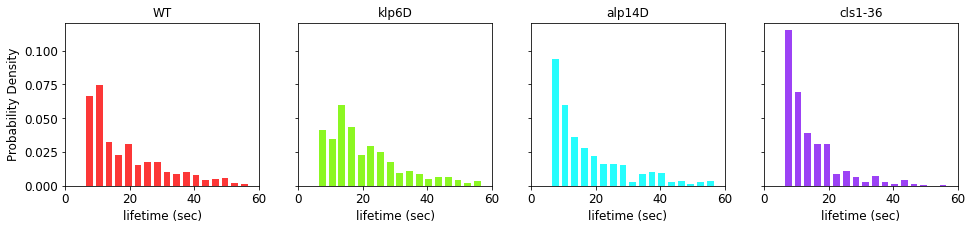

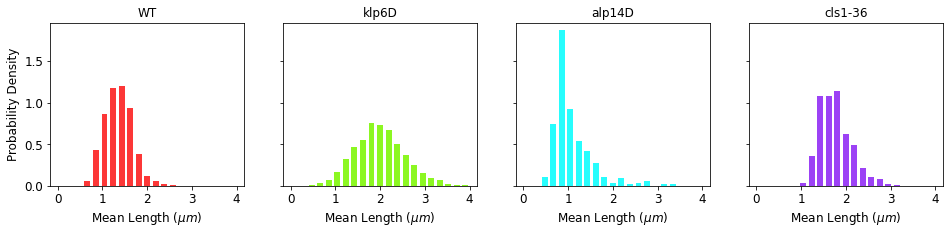

In [51]:
# Plot Histograms

# Plot lifetimes
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
for idx in np.arange(num_strains):
    ax[idx].hist(df.lifetime[idx], bins=np.arange(0,60,3), color=cols[idx],
                                alpha=0.9, rwidth=0.7, density=True)
    ax[idx].set(xlabel='lifetime (sec)', xlim=[-0.1,60.1], title=df.name[idx])
ax[0].set(ylabel='Probability Density')

# Plot lengths
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
for idx in np.arange(num_strains):
    ax[idx].hist(df.mean_length[idx], bins=np.linspace(0,4,22), color=cols[idx],
                            alpha=0.9, rwidth=0.7, density=True)
    ax[idx].set(xlabel=r'Mean Length ($\mu m$)', title=df.name[idx])
ax[0].set(ylabel='Probability Density')

### Probability Density Plots 

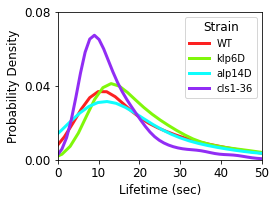

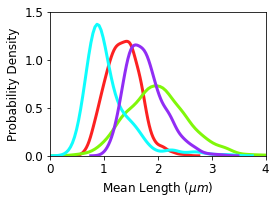

In [90]:
# Density Plot
#Lifetime
fig, ax = plt.subplots(figsize=(4,3))
# Iterate through the strains
for idx in np.arange(num_strains):
    
    ctau = df.lifetime[idx]
    
    # Draw the density plot
    sns.distplot(ctau, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},
                 label = strain_names[idx], color=cols[idx])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Strain')
plt.xlabel('Lifetime (sec)')
plt.xlim([0,50])
plt.ylim([0,0.08])
plt.yticks([0,0.04,0.08])

plt.ylabel('Probability Density')
plt.tight_layout()
# plt.savefig('/Users/saadjansari/Desktop/strain_lifetime_pdf.pdf')

# Length
fig, ax = plt.subplots(figsize=(4,3))
# Iterate through the strains
for idx in np.arange(num_strains):
    
    clens = df.mean_length[idx]
    
    # Draw the density plot
    sns.distplot(clens, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},
                 color=cols[idx], 
#                  label = strain_names[idx]
                )
    
# Plot formatting
#plt.legend(prop={'size': 10}, title = 'Strain')
plt.xlabel(r'Mean Length ($\mu m$)')
plt.ylabel('Probability Density')
plt.xlim([0,4])
plt.ylim([0,1.5])
plt.yticks([0,0.5,1.0,1.5])

plt.tight_layout()
# plt.savefig('/Users/saadjansari/Desktop/strain_length_pdf.pdf')

### Cumulative Density Plots 

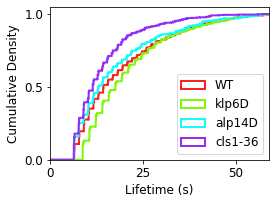

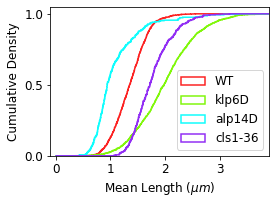

In [94]:
# Cumulative step Histograms

# Plot lifetimes
fig, ax = plt.subplots(figsize=(4,3))
for idx in np.arange(num_strains):
    ax.hist(df.lifetime[idx], bins=np.arange(0,60,0.1), color=cols[idx],
            alpha=1.0, rwidth=None, density=True, lw=2,
            cumulative=True, histtype='step', label=df.name[idx])
ax.set(xlabel='Lifetime (s)', xlim=[-0.1,59.0])
ax.set(ylabel='Cumulative Density')
ax.set(xticks=[0,25,50], yticks=[0,0.5,1.0])
ax.legend(loc=4)
plt.tight_layout()

plt.savefig('/Users/saadjansari/Desktop/monopolar_cdf_lifetime.pdf')

# Plot lengths
fig, ax = plt.subplots(figsize=(4,3))
for idx in np.arange(num_strains):
    ax.hist(df.mean_length[idx], bins=np.linspace(0,4,10000), color=cols[idx],
            alpha=1.0, rwidth=None, density=True, cumulative=True, lw=1.5, 
            histtype='step', label=df.name[idx])
ax.set(xlabel=r'Mean Length ($\mu m$)', xlim=[-0.1,3.9])
ax.set(ylabel='Cumulative Density')
ax.set(xticks=[0,1,2,3], yticks=[0,0.5,1.0])
ax.legend(loc=4)
plt.tight_layout()

plt.savefig('/Users/saadjansari/Desktop/monopolar_cdf_length.pdf')


### Lifetime vs Length 

WT:
	Median Lifetime = 13.00 sec
	Mean Lifetime = 21.39 sec
	Median Length = 1.35 micron
	Mean Length = 1.36 micron
klp6D:
	Median Lifetime = 15.77 sec
	Mean Lifetime = 20.85 sec
	Median Length = 1.98 micron
	Mean Length = 2.00 micron
alp14D:
	Median Lifetime = 10.27 sec
	Mean Lifetime = 18.16 sec
	Median Length = 0.94 micron
	Mean Length = 1.08 micron
cls1-36:
	Median Lifetime = 10.40 sec
	Mean Lifetime = 12.76 sec
	Median Length = 1.72 micron
	Mean Length = 1.77 micron


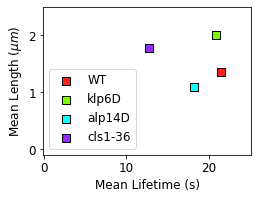

In [95]:
# Mean Lifetime vs Mean length
print_str = '{0}:\n\tMedian Lifetime = {1:.2f} sec\n\tMean Lifetime = {2:.2f} sec\n\tMedian Length = {3:.2f} micron\n\tMean Length = {4:.2f} micron'
fig, ax = plt.subplots(figsize=(4,3))
for idx in np.arange(num_strains):
        
    ctau = df.lifetime[idx]
    clens = df.mean_length[idx]
    
    # Remove nan values
    arr1 = np.array( ctau)
    arr2 = np.array( clens)
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]
    print( print_str.format(
        df.name[idx], 
        np.median(arr1),
        np.mean(arr1),
        np.median(arr2),
        np.mean(arr2)) )
    ax.scatter(np.mean(arr1), np.mean(arr2), color=cols[idx],
               s=80, marker="s", edgecolors='k', label=strain_names[idx])
#     ax.errorbar(np.mean(arr1), np.mean(arr2), 
#                 xerr=np.std(arr1), yerr=np.std(arr2),
#                 color=cols[idx], marker="D", label=strain_names[idx])
ax.set(xlabel='Mean Lifetime (s)', ylabel=r'Mean Length ($\mu m$)',
       ylim=[-0.1,2.5], xlim=[-0.1,25.1])  
plt.tight_layout()
ax.set(xticks=[0,10,20], yticks=[0,1,2])
plt.legend(loc=3)
plt.savefig('/Users/saadjansari/Desktop/monopolar_mean_len_vs_lifetime.pdf')

In [68]:
arr2.size

446

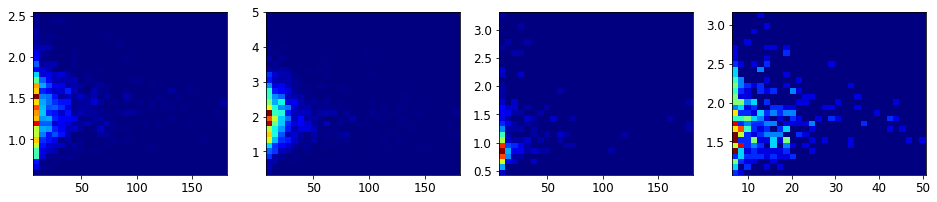

In [93]:
# Histogram Lifetime vs Mean length
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
for idx in np.arange(num_strains):
        
    ctau = df.lifetime[idx]
    clens = df.mean_length[idx]
    
    # Remove nan values
    arr1 = np.array( ctau)
    arr2 = np.array( clens)
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]
    
    ax[idx].hist2d(arr1, arr2, bins=(30,30), cmap=plt.cm.jet)